([<matplotlib.patches.Wedge at 0x20f959d3640>,
 [Text(-0.6821935355184279, -0.8629090219118513, 'Spam'),
  Text(0.682193535518428, 0.8629090219118511, 'Ham')],
 [Text(-0.3721055648282333, -0.4706776483155552, '50.9%'),
  Text(0.37210556482823337, 0.47067764831555514, '49.1%')])

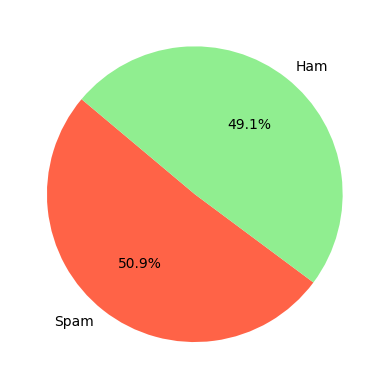

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/enronspam.csv')

counts = df['spam'].value_counts()

plt.pie(counts, labels=['Spam', 'Ham'], colors=['tomato', 'lightgreen'], autopct='%1.1f%%', startangle=140)

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19312\2768154217.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)


(-0.5, 799.5, 399.5, -0.5)

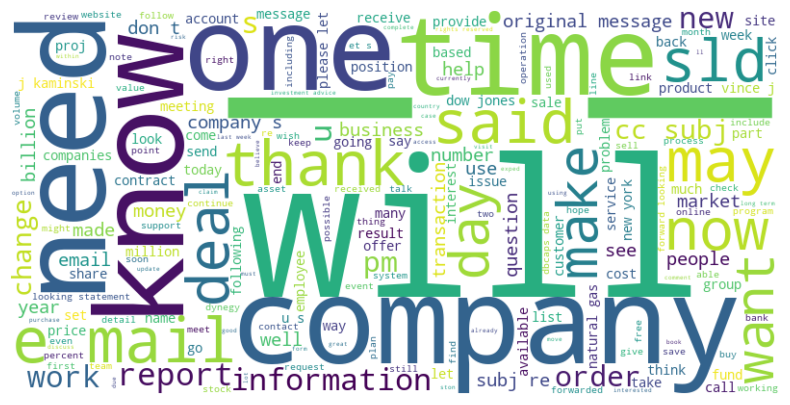

In [5]:
from wordcloud import WordCloud

remove = ["Subject:", "enron", "ect", "hou", "\\", "text_  ", "\r\n", "hpl actuals"]

for word in remove:
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)

text_corpus = " ".join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19312\3069151274.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)


(-0.5, 799.5, 399.5, -0.5)

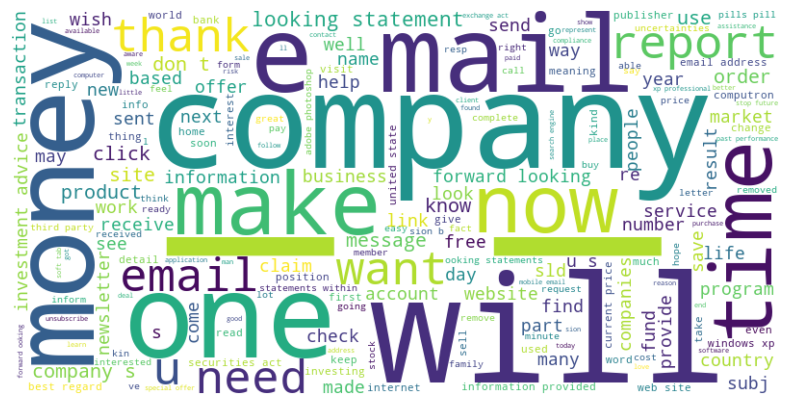

In [10]:
df = pd.read_csv('../data/enronspam.csv')

mask = df['spam'] == 0

df = df[~mask]

remove = ["Subject:", "enron", "ect", "hou", "\\", "text_  ", "\r\n", "hpl actuals"]

for word in remove:
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)

text_corpus = " ".join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

C:\Users\Ryan\AppData\Local\Temp\ipykernel_19312\2632935413.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)


(-0.5, 799.5, 399.5, -0.5)

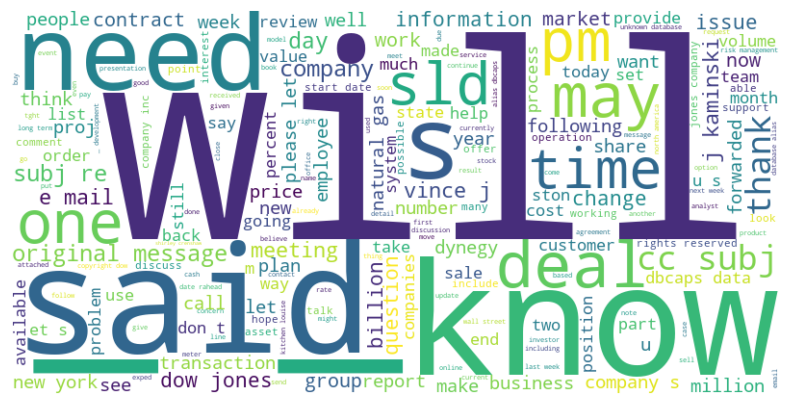

In [11]:
df = pd.read_csv('../data/enronspam.csv')

mask = df['spam'] == 1

df = df[~mask]

remove = ["Subject:", "enron", "ect", "hou", "\\", "text_  ", "\r\n", "hpl actuals"]

for word in remove:
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)

text_corpus = " ".join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

/tmp/ipykernel_21812/3967072549.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)


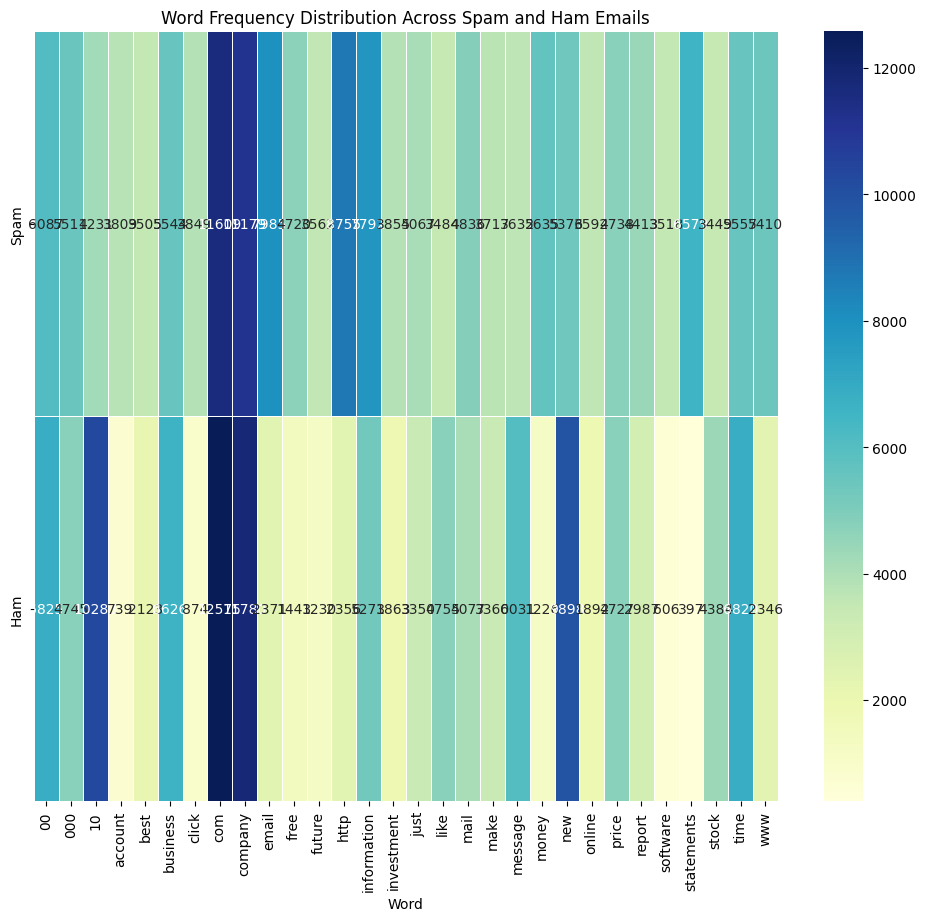

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/enronspam.csv')

remove = ["Subject:", "enron", "ect", "hou", "\\", "text_  ", "\r\n", "hpl actuals"]

for word in remove:
  df = df.applymap(lambda x: x.replace(word, '') if isinstance(x, str) else x)

# Split the dataset into spam and ham
spam_texts = df[df['spam'] == 1]['text']
ham_texts = df[df['spam'] == 0]['text']

# Use Count Vectorizer to get word frequencies
vectorizer = CountVectorizer(max_features=30, stop_words='english')
spam_word_counts = vectorizer.fit_transform(spam_texts).sum(axis=0)
ham_word_counts = vectorizer.transform(ham_texts).sum(axis=0)

# Convert to numpy arrays
spam_word_counts = np.array(spam_word_counts)[0]
ham_word_counts = np.array(ham_word_counts)[0]

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Spam': spam_word_counts,
    'Ham': ham_word_counts
}).set_index('Word')

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df.T, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5, linecolor='white')
plt.title("Word Frequency Distribution Across Spam and Ham Emails")
plt.show()
